<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/TAREA%203%3A%20Integraci%C3%B3n/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto 5

 Resolver la siguiente integral con el método del trapecio:

 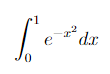


In [177]:
import numpy as np
def funcion(x):
   return np.exp(-x**2)

In [178]:
def trapecio(f,a,b,n):
  x = np.linspace(a,b,n+1)
  y = f(x)
  h = (b-a)/n
  integral = (h/2)*(np.sum(y[:-1]+y[1:]))
  return integral


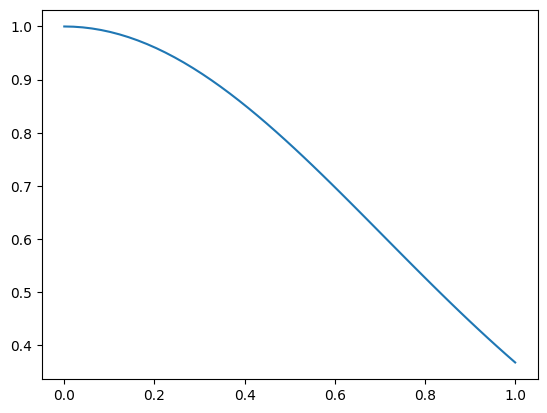

In [179]:
import matplotlib.pyplot as plt
x = np.linspace(0,1,50)
y = funcion(x)
plt.plot(x,y)

In [180]:
import sympy as sp
import numpy as np
x = sp.Symbol('x')
f = sp.exp(-x**2)
df2= sp.diff(f,x,2)
subs = df2.subs(x,0.5)
print(subs)
b= 1
a=0
#NÚMERO DE PARTICIONES
error = 0.005
n = np.sqrt((((b-a)**3)*float(-subs))/(12*error))
print("El número de puntos para un error menor a 0,005 es de: ", round(n))

-0.778800783071405
El número de puntos para un error menor a 0,005 es de:  4


In [181]:
integral_euler = trapecio(funcion,0,1,4)
print("La integral estimada es ")
print(integral_euler)

La integral estimada es 
0.7429840978003812


In [182]:
error = np.abs(integral_euler - 0.746824)
print(error)

0.0038399021996188276


PUNTO 9

La regla de Simpson 3/8 consiste en aproximar el integrando por un polinomiointerpolador de orden 3.

In [183]:
import sympy as sp

x, h, a = sp.symbols('x h a')
f = sp.Function('f')

x0 = a
x1 = a+h
x2 = a+2*h
x3 = a+3*h

L0 = ((x - x1)*(x - x2)*(x - x3)) / ((x0 - x1)*(x0 - x2)*(x0 - x3))
L1 = ((x - x0)*(x - x2)*(x - x3)) / ((x1 - x0)*(x1 - x2)*(x1 - x3))
L2 = ((x - x0)*(x - x1)*(x - x3)) / ((x2 - x0)*(x2 - x1)*(x2 - x3))
L3 = ((x - x0)*(x - x1)*(x - x2)) / ((x3 - x0)*(x3 - x1)*(x3 - x2))

P = f(a)*L0 + f(x1)*L1 + f(x2)*L2 + f(x3)*L3
integral = sp.integrate(P, (x, a, a + 3*h))
integral = sp.simplify(integral)
integral


3*h*(f(a) + 3*f(a + h) + 3*f(a + 2*h) + f(a + 3*h))/8

Dado  que h= (b−a)/3,  muestre  que  los  puntos  intermedios  son 2a+b/3 y a+2b/3 respectivamente

In [184]:
#remplazando h en los puntos
x, b, a = sp.symbols('x b a')
h = (b-a)/3

x0=a
x1 = a+h
x2 = a+2*h
x3 = a+3*h
x = [x0, x1, x2, x3]
x

[a, 2*a/3 + b/3, a/3 + 2*b/3, b]

In [185]:
print("Los puntos medios son: ", x[1], "y", x[2])

Los puntos medios son:  2*a/3 + b/3 y a/3 + 2*b/3


PUNTO 10

In [186]:
import sympy as sp

x, h = sp.symbols('x h')
f = sp.Function('f')
n = 3
derivadaenesima = sp.diff(f(x),x, n+1)
e = derivadaenesima.subs(x, sp.Symbol('ξ'))/sp.factorial(n+1)

integral = sp.expand(x * (x - h) * (x - 2*h) * (x - 3*h))
I = sp.integrate(integral, (x, 0, 3*h))
I = sp.simplify(I)* e
print(I)


-3*h**5*Derivative(f(ξ), (ξ, 4))/80


PUNTO 16

Estime la siguiente integral usando método de Gauss-Legendre:
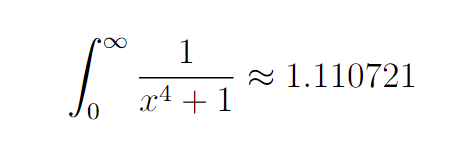

In [187]:
import numpy as np
import sympy as sp

In [188]:
def fcero1(x):
    return 0.5*(1/((((x+1)/2)**4)+1))

In [189]:
def finfinito(x):
    return 0.5*(((x+1)/2)**-2)*(1/(((2/(x+1))**4)+1))

In [190]:
def CuadraturaGaussLegendre(a,b,funcion,n):
  raices, pesos = np.polynomial.legendre.leggauss(n)
  raicest = 0.5 * (raices*(b - a) + a + b)
  integral = 0.5 * (b - a) * np.sum(pesos * funcion(raicest))
  return integral

In [191]:
#Cálculo de la integral
integral = CuadraturaGaussLegendre(-1,1,fcero1,4)+ CuadraturaGaussLegendre(-1,1,finfinito,4)
print(CuadraturaGaussLegendre(-1,1,fcero1,4))
print(CuadraturaGaussLegendre(-1,1,finfinito,4))
print("La integral estimada es de ", integral)


0.8669556574543683
0.24382693094823105
La integral estimada es de  1.1107825884025995


 PUNTO 17

 In the black-body radiation problem the following integral appear:

 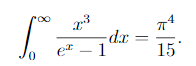

a)  Compute this integral using the Gauss-Laguerre quadrature method for n=3 evaluationpoints.

b)  For this estimation, plot the relative error (εr(n) =Iestimated(n)/Iexact) as a functionof the evaluation points, withn= [2,3,...,10] [4.6].


In [192]:
def funcion(x):
  return (x**3)/(1-np.exp(-x))

In [193]:
import numpy as np
def GaussLaguerre(f, n):
    Roots, Weights = np.polynomial.laguerre.laggauss(n)
    integral = np.sum( Weights*f(Roots) )
    return integral

In [194]:
#Integral n=3
integral = GaussLaguerre(funcion,3)
print(integral)

6.481130171540027


Gráfica

In [195]:
#Integral exacta
IExacta = (np.pi**4)/ 15
print(IExacta)

6.493939402266828


In [196]:
#Integral estimada despendiendo de n
ni = np.linspace(2, 10, 9)
IEstimada = np.zeros(len(ni))

for n in range(len(ni)):
    IEstimada[n] = GaussLaguerre(funcion, int(ni[n]))

print(ni, IEstimada)

[ 2.  3.  4.  5.  6.  7.  8.  9. 10.] [6.41372747 6.48113017 6.49453564 6.49431337 6.49394141 6.49391891
 6.49393567 6.4939402  6.49393997]


In [197]:
#Error
Error = IEstimada/IExacta
print(Error)

[0.98764819 0.99802751 1.00009181 1.00005759 1.00000031 0.99999684
 0.99999942 1.00000012 1.00000009]


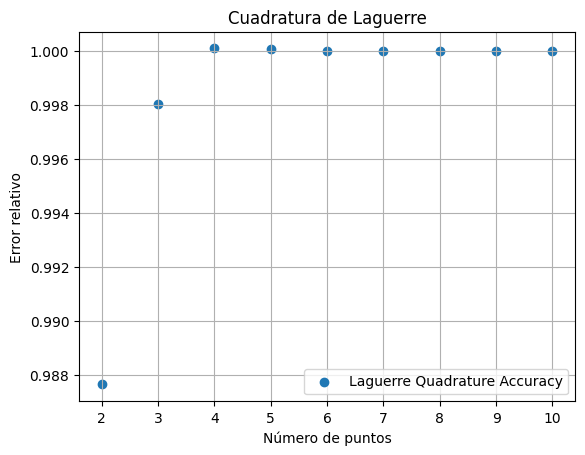

In [199]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.grid(True)
ax.scatter(ni, Error, label='Laguerre Quadrature Accuracy')
plt.xlabel('Número de puntos')
plt.ylabel('Error relativo')
plt.title('Cuadratura de Laguerre')
ax.legend()
plt.show()
